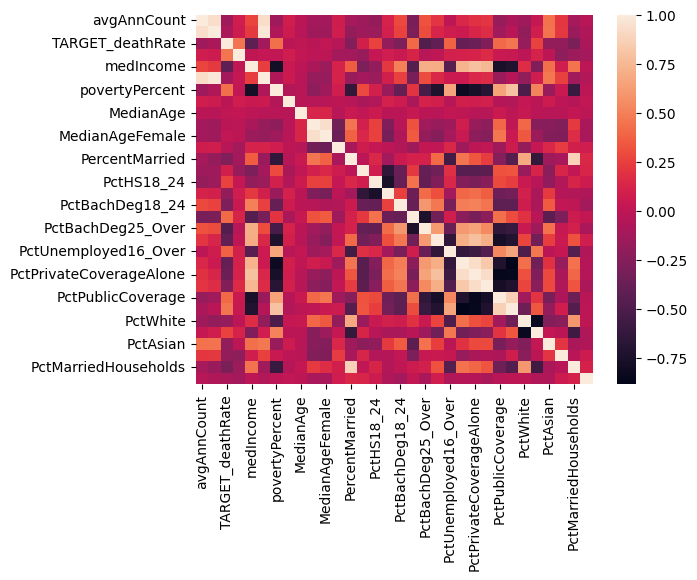

C:\Users\patwa\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


RMSE: 19.20579873400248
R-squared: 0.5492027689753898
Mean: 178.66406301279943


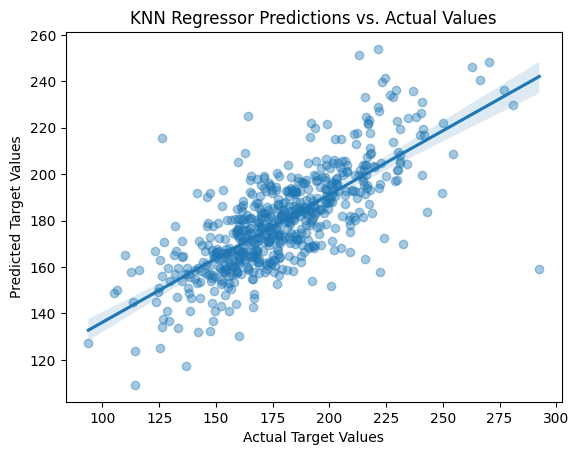

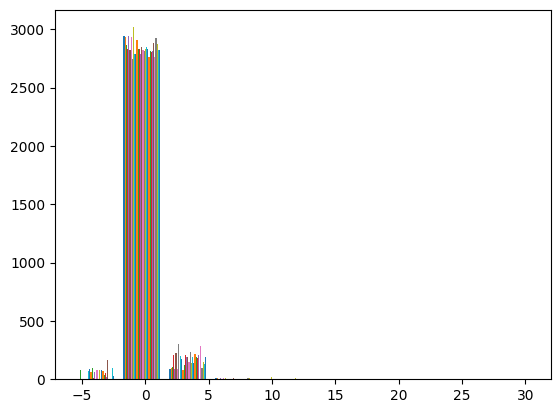

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale
from sklearn.impute import SimpleImputer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

# Load the dataset into a pandas DataFrame
df = pd.read_csv('cancer_reg (1).csv', encoding="latin1")

#Correlation Matirx
sns.heatmap(df.corr(),annot=False)
plt.show()

#Mean in Range data set
for i in range(len(df['binnedInc'])):
    orgVal  = df['binnedInc'][i]
    valsStr = orgVal[1:-1]
    vals      = valsStr.split(", ")
    newVal    = (float(vals[0]) + float(vals[1])) / 2 
    df['binnedInc'][i] = newVal

# Separate the target variable from the features
X = df.drop(['TARGET_deathRate',"Geography",'PctSomeCol18_24'], axis=1)
y = df['TARGET_deathRate']

# Impute NaN values using mean imputation
mean_value=X.mean()
X = X.fillna(value=mean_value, inplace=False)

# Scale the features
for column in X.keys():
    X[column] = (X[column] - X[column].mean()) / (X[column].std())

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##############################################################################
base_estimator = DecisionTreeRegressor(max_depth=10)

# Create a bagging regressor with 100 estimators
bag_reg = BaggingRegressor(base_estimator=base_estimator, n_estimators=200, random_state=42)

# Fit the bagging regressor to the training data
bag_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = bag_reg.predict(X_test)

##############################################################################
#ACcuracy
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
print('RMSE:', rmse)
print('R-squared:', r2)
print('Mean:', np.mean(df['TARGET_deathRate']))

# Scatter plot 
sns.regplot(x=y_test, y=y_pred, scatter_kws={'alpha':0.4})
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('KNN Regressor Predictions vs. Actual Values')
plt.show()

_ = plt.hist(X)
